In [1]:
import sys

sys.path.append('../..')

import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt

from VISTorchUtils import VISDatasetV3
from IPython.display import Audio

In [2]:
dataset = VISDatasetV3('/scratch/vis_data_v3/test')

/scratch/vis_data_v3/test/*.pkl


/home2/dhruv.kapur/anaconda3/envs/torch/lib/python3.9/site-packages/transformers/models/videomae/feature_extraction_videomae.py:28: FutureWarning: The class VideoMAEFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use VideoMAEImageProcessor instead.
  warnings.warn(


In [3]:
_, _, wav = dataset[0]

In [4]:
def splitWave(wav, freq):
    freq_data = torch.fft.rfft(wav)
    
    lf = torch.zeros_like(freq_data)
    lf[:freq] = freq_data[:freq]
    
    hf = torch.zeros_like(freq_data)
    hf[freq:] = freq_data[freq:]
    
    lf_wav = torch.fft.irfft(lf)
    hf_wav = torch.fft.irfft(hf)
    return lf_wav, hf_wav

def mergeWaves(lf_wav, hf_wav):
    lf = torch.fft.rfft(lf_wav)
    hf = torch.fft.rfft(hf_wav)
    freq_data = lf + hf
    return torch.fft.irfft(freq_data)

In [5]:
lf_wav, hf_wav = splitWave(wav, 5000)
wav_rec = mergeWaves(lf_wav, hf_wav)

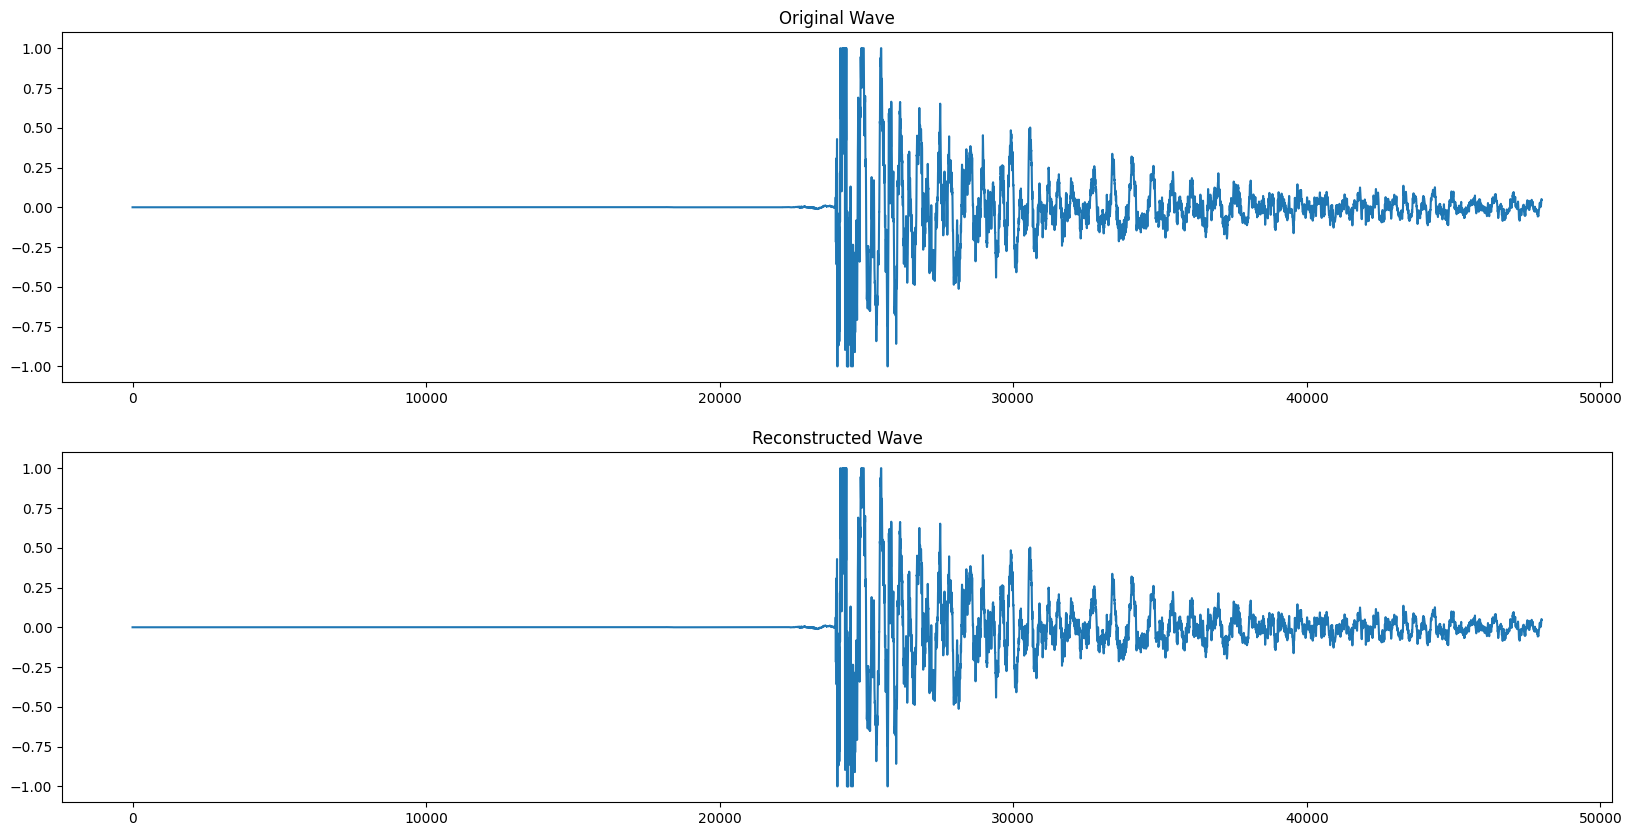

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

axs[0].plot(range(len(wav)), wav)
axs[0].set_title("Original Wave")
axs[1].plot(range(len(wav_rec)), wav_rec)
axs[1].set_title("Reconstructed Wave")
plt.show()

In [6]:
Audio(wav, rate=96000)

In [7]:
Audio(wav_rec, rate=96000)